In [14]:
import pandas as pd
from cloudmesh.common.util import readfile
from io import StringIO
import matplotlib.pyplot as plt
import seaborn as sns


In [16]:
!python mnist.py --gpu=0 --delay=0.1 --user="gregor" --node="RTX3090"

2022-03-15 15:19:27.439079: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-03-15 15:19:27.456764: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-03-15 15:19:27.456880: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
2022-03-15 15:19:27.457223: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other

In [9]:
filename="mnist.log.log"

content = readfile ("mnist.log.log").splitlines()

header = "time,gpu_util,memory_util,encoder_util,decoder_util,gpu_temp_C,power_draw_W"
result = ""
for line in content:
    if not line.startswith("#") and not line.startswith(" ") and not line.startswith("\n") and not line.startswith("gpu"):
        result = result + line + "\n"

result = header + "\n" + result



csvStringIO = StringIO(result)

df = pd.read_csv(csvStringIO, comment='#', sep=",") 

df.time = pd.to_datetime(df['time'], format='%Y-%m-%d %H:%M:%S.%f')
df["x"] = df.index

df

,time,gpu_util,memory_util,encoder_util,decoder_util,gpu_temp_C,power_draw_W,x
0,2022-03-15 15:15:23.296378,14,1,0,0,51,96.05,0
1,2022-03-15 15:15:23.398172,14,1,0,0,51,104.24,1
2,2022-03-15 15:15:23.495167,0,1,0,0,51,112.39,2
3,2022-03-15 15:15:23.598846,0,1,0,0,51,120.60,3
4,2022-03-15 15:15:23.693600,0,1,0,0,51,128.86,4
...,...,...,...,...,...,...,...,...
72,2022-03-15 15:15:30.431394,16,2,0,0,53,143.99,72
73,2022-03-15 15:15:30.531131,16,1,0,0,53,143.43,73
74,2022-03-15 15:15:30.631236,16,1,0,0,53,142.55,74
75,2022-03-15 15:15:30.731476,12,1,0,0,53,141.85,75


In [10]:
df["time"]

0    2022-03-15 15:15:23.296378
1    2022-03-15 15:15:23.398172
2    2022-03-15 15:15:23.495167
3    2022-03-15 15:15:23.598846
4    2022-03-15 15:15:23.693600
                ...            
72   2022-03-15 15:15:30.431394
73   2022-03-15 15:15:30.531131
74   2022-03-15 15:15:30.631236
75   2022-03-15 15:15:30.731476
76   2022-03-15 15:15:30.832124
Name: time, Length: 77, dtype: datetime64[ns]

<AxesSubplot:xlabel='time', ylabel='gpu_util'>

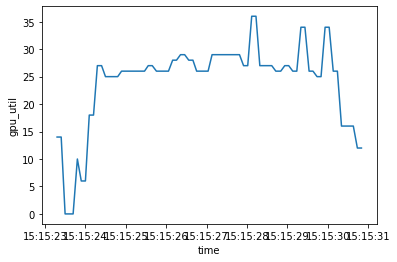

In [11]:
sns.lineplot(y='gpu_util', x="time", data=df)

<AxesSubplot:xlabel='time', ylabel='gpu_temp_C'>

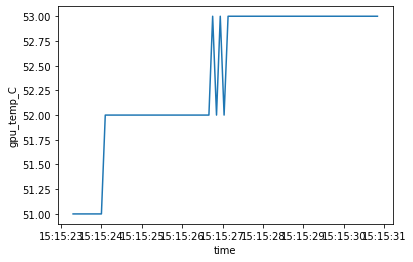

In [12]:
sns.lineplot(y='gpu_temp_C', x="time", data=df)

<AxesSubplot:xlabel='time', ylabel='power_draw_W'>

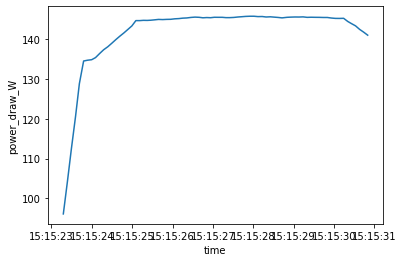

In [13]:
sns.lineplot(y='power_draw_W', x="time", data=df)